# Logistic Regression

## Overview
- [1. Regression and Sigmoid](#1)
- [2. Cost function and Gradient](#2)
    - [Cost function](#2.0)
    - [Partial derivative of  $𝐽(\theta)$](#2.1)
    - [Update the weights](#2.2)
    - [Implement gradient descent function](#2.3)
- [3. Training model](#3)
    - [Import dataset](#3.1)
    - [Model](#3.2)
- [4. Test model](#4)
    - [Your model](#4.1)
    - [Sklearn model](#4.2)
- [5. Reference](#5)



## Import package

In [1]:
import numpy as np
import pandas as pd
import warnings

from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

<a name='1' ></a>
## 1. Regression and Sigmoid

Logistic Regression using sigmoid function for text classification.
* Sigmoid function is defined as: 

$$ h(z) = \frac{1}{1+\exp^{-z}}$$

where $z$ is a regular linear regression

$$ z = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... \theta_N x_N $$

It maps the input $z$ to a value that ranges between $0$ and $1$, and so it can be treated as a probability.

<div style="width:image width px; font-size:100%; text-align:center;"><img src='images/sigmoid_plot.jpg' alt="alternate text" width="width" height="height" style="width:600px;height:400px;" /> Figure 1. Sigmoid function </div>

In [2]:
def sigmoid(z): 
    '''
    Input:
        z: is the input (can be a scalar or an array)
    Output:
        h: the sigmoid of z
    '''
    
    h = 1 / (1 + np.exp(-z))
    
    return h

In [3]:
# Test sigmoid function
if sigmoid(0) == 0.5:
    print('SUCCESS!')
else:
    print('Oops!')

if sigmoid(4.92) == 0.9927537604041685:
    print('CORRECT!')
else:
    print('Oops again!')

SUCCESS!
CORRECT!


<a name='2' ></a>
## 2. Cost function and Gradient

<a name='2.0' ></a>
### Cost function
We have: 

$$ P(y|x^{(i)}, \theta) = h(x^{(i)}, \theta)^{y^{(i)}}(1-h(x^{(i)}, \theta))^{1-y^{(i)}} $$

where $y^{(i)} \in \{0, 1\}$

Now we want to find a way to model the entire data set and not just one example. To do so, we will define the likelihood as follows:

$$ L(\theta) = \prod_{i=1}^{m} P(y|x^{(i)}, \theta) = \prod_{i=1}^{m} h(x^{(i)}, \theta)^{y^{(i)}}(1-h(x^{(i)}, \theta))^{1-y^{(i)}} $$

One issue is that as mmm gets larger, what happens to $L(\theta)$? It goes close to zero, because both numbers $h(x^{(i)}, \theta)$ and $(1-h(x^{(i)}, \theta))$ are bounded between 0 and 1. Since we are trying to maximize $h(\theta, x^{(i)})$ in $L(\theta)$, we can introduce the log and just maximize the log of the function.

\begin{align*}
max_{h(x^{(i)},\theta)} logL(\theta) &=log \prod_{i=1}^m h(x^{(i)}, \theta)^{y^{(i)}}(1-h(x^{(i)}, \theta))^{1-y^{(i)}} \\
&= \sum_{i=1}^{m} log h(x^{(i)}, \theta)^{y^{(i)}}(1-h(x^{(i)}, \theta))^{1-y^{(i)}} \\
&= \sum_{i=1}^m y^{(i)}\log (h(z(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(z(\theta)^{(i)}) \\
\end{align*}

Hence, we now divide by m, because we want to see the average cost. 

$$\frac{1}{m} \sum_{i=1}^m y^{(i)}\log (h(z(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(z(\theta)^{(i)})
$$

Remember that we were maximizing $h(\theta, x^{(i)})$ in the equation above. It turns out that maximizing an equation is the same as minimizing its negative. Hence we add a negative sign and we end up minimizing the cost function.The cost function used for logistic regression is the average of the log loss across all training examples:

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^m y^{(i)}\log (h(z(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(z(\theta)^{(i)}))$$
* $m$ is the number of training examples
* $y^{(i)}$ is the actual label of the i-th training example.
* $h(z(\theta)^{(i)})$ is the model's prediction for the i-th training example.


The loss function for a single training example is
$$ Loss = -1 \times \left( y^{(i)}\log (h(z(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(z(\theta)^{(i)})) \right)$$

* All the $h$ values are between 0 and 1, so the logs will be negative. That is the reason for the factor of -1 applied to the sum of the two loss terms.
* Note that when the model predicts 1 ($h(z(\theta)) = 1$) and the label $y$ is also 1, the loss for that training example is 0. 
* Similarly, when the model predicts 0 ($h(z(\theta)) = 0$) and the actual label is also 0, the loss for that training example is 0. 
* However, when the model prediction is close to 1 ($h(z(\theta)) = 0.9999$) and the label is 0, the second term of the log loss becomes a large negative number, which is then multiplied by the overall factor of -1 to convert it to a positive loss value. $-1 \times (1 - 0) \times log(1 - 0.9999) \approx 9.2$ The closer the model prediction gets to 1, the larger the loss.

In [4]:
# verify that when the model predicts close to 1, but the actual label is 0, the loss is a large positive value
-1 * (1 - 0) * np.log(1 - 0.9999) # loss is about 9.2

9.210340371976294

In [5]:
# verify that when the model predicts close to 0 but the actual label is 1, the loss is a large positive value
-1 * np.log(0.0001) # loss is about 9.2

9.210340371976182

<a name='2.1' ></a>
### Partial derivative of $J(\theta)$


We have,

$$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{\partial J}{\partial h} \frac{\partial h}{\partial z} \frac{\partial z}{\partial \theta_j} \\
$$

In here, we assume that $h=h^{(i)}, z=z^{(i)}$ for single training example


\begin{align*}
\frac{\partial J(\theta)}{\partial h} &= \left(-\frac{1}{m} \sum_{i=1}^m ylog h + (1-y)\log (1-h) \right)' \\
&= -\frac{1}{m} \sum_{i=1}^m \frac{y}{h} - \frac{1-y}{1-h}  \\
&= -\frac{1}{m} \sum_{i=1}^m \frac{y - h}{h(1-h)} \\
&= \frac{1}{m} \sum_{i=1}^m \frac{h - y}{h(1-h)}
\end{align*}

$$
h(z)' = \left( \frac{1}{1+e^{-z}} \right)' = \frac{1}{1+e^{-z}}\frac{e^{-z}}{1+e^{-z}} = h(z)(1-h(z)) = h(1-h)
$$

$$\frac{\partial z}{\partial \theta_j} = x_j$$

Therefore,
\begin{align*}
\frac{\partial J(\theta)}{\partial \theta_j} &= \frac{\partial J}{\partial h} \frac{\partial h}{\partial z} \frac{\partial z}{\partial \theta_j} \\
&= \frac{1}{m} \sum_{i=1}^m \frac{h^{(i)} - y^{(i)}}{h^{(i)}(1-h^{(i)})} h^{(i)}(1-h^{(i)}) x_j \\
&= \frac{1}{m} \sum_{i=1}^m(h^{(i)}-y^{(i)})x^{(i)}_j
\end{align*}

<a name='2.2' ></a>
### Update the weights

To update your weight vector $\theta$, you will apply gradient descent to iteratively improve your model's predictions.  
The gradient of the cost function $J$ with respect to one of the weights $\theta_j$ is:

$$\nabla_{\theta_j}J(\theta) = \frac{1}{m} \sum_{i=1}^m(h^{(i)}-y^{(i)})x^{(i)}_j$$
* 'i' is the index across all 'm' training examples.
* 'j' is the index of the weight $\theta_j$, so $x^{(i)}_j$ is the feature associated with weight $\theta_j$

* To update the weight $\theta_j$, we adjust it by subtracting a fraction of the gradient determined by $\alpha$:
$$\theta_j = \theta_j - \alpha \times \nabla_{\theta_j}J(\theta) $$
It is optimization algorithm called [Gradient Descent.](https://builtin.com/data-science/gradient-descent)
* The learning rate $\alpha$ is a value that we choose to control how big a single update will be.


<a name='2.3' ></a>
### Implement gradient descent function
* The number of iterations `num_iters` is the number of times that you'll use the entire training set.
* For each iteration, you'll calculate the cost function using all training examples (there are `m` training examples), and for all features.
* Instead of updating a single weight $\theta_i$ at a time, we can update all the weights in the column vector:  
$$\mathbf{\theta} = \begin{pmatrix}
\theta_0
\\
\theta_1
\\ 
\theta_2 
\\ 
\vdots
\\ 
\theta_n
\end{pmatrix}$$
* $\mathbf{\theta}$ has dimensions (n+1, 1), where 'n' is the number of features, and there is one more element for the bias term $\theta_0$ (note that the corresponding feature value $\mathbf{X_0}$ is 1).
* The 'logits', 'z', are calculated by multiplying the feature matrix 'x' with the weight vector 'theta'.  $z = \mathbf{X}\mathbf{\theta}$
    * $\mathbf{X}$ has dimensions (m, n+1) 
    * $\mathbf{\theta}$: has dimensions (n+1, 1)
    * $\mathbf{z}$: has dimensions (m, 1)
* The prediction 'h', is calculated by applying the sigmoid to each element in 'z': $h(z) = sigmoid(z)$, and has dimensions (m,1).
* The cost function $J$ is calculated by taking the dot product of the vectors 'y' and 'log(h)'.  Since both 'y' and 'h' are column vectors (m,1), transpose the vector to the left, so that matrix multiplication of a row vector with column vector performs the dot product.
$$J = \frac{-1}{m} \times \left(\mathbf{y}^T \cdot log(\mathbf{h}) + \mathbf{(1-y)}^T \cdot log(\mathbf{1-h}) \right)$$
* The update of theta is also vectorized.  Because the dimensions of $\mathbf{X}$ are (m, n+1), and both $\mathbf{h}$ and $\mathbf{y}$ are (m, 1), we need to transpose the $\mathbf{X}$ and place it on the left in order to perform matrix multiplication, which then yields the (n+1, 1) answer we need:
$$\mathbf{\theta} = \mathbf{\theta} - \frac{\alpha}{m} \times \left( \mathbf{X}^T \cdot \left( \mathbf{h-y} \right) \right)$$

In [6]:
def gradient_descent(X, y, theta, alpha, num_iters, verbose=False):
    '''
    Input:
        X: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
        verbose: True if you want to print theta after each iteration
    Output:
        J: the final cost
        theta: your final weight vector
    '''
    
    # Get the number of training example (rows in matrix)
    m = X.shape[0]
    
    # Loop and update theta
    for i in range(num_iters): 
        
        # Get z
        z = np.dot(X, theta)
        
        # Get sigmoid of z from sigmoid function
        h = sigmoid(z)
        
        # Calculate the cost function
        J = -1 / m * (np.dot(y.T, np.log(h)) + np.dot((1-y).T, np.log(1-h)))
        
        # Update theta
        theta = theta - alpha / m * np.dot(X.T, h-y)
        
        # Print or not
        if verbose and i % 100 == 0: 
            print(f"The cost at loop {i} is {float(J):.8f}.")
            print(f"The resulting vector of weights at loop {i} is {[round(t, 8) for t in np.squeeze(theta)]}\n")
                  
    
    return np.squeeze(J), np.squeeze(theta)

<a name='3' ></a>
## 3. Training model
<a name='3.1' ></a>
### Import dataset
In this part, [iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) is used from sklearn library. 

In [7]:
from sklearn import datasets

iris = datasets.load_iris()
print(f'Feature: {iris["feature_names"]}')
print(f'Target: {iris["target_names"]}')


X = iris['data'][:, 3:] # petal width feature
y = (iris['target'] == 2).astype(np.int) # label - virginica

# Overview about dataset
X.T, y

Feature: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target: ['setosa' 'versicolor' 'virginica']


(array([[0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
         0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
         0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
         0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
         1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
         1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
         1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
         1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
         2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
         2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
         1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
         2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

<a name='3.2' ></a>
### Model
We will use model that built from previous part to predict virginica or not-virginica

In [8]:
np.random.seed(365)

m = X.shape[0]    # total training examples
n = X.shape[1]    # number of features
X0 = np.ones((m, 1))    # bias
theta = np.random.rand(n+1, 1)
alpha = 0.5
num_iters = 600
y_train = y.reshape(m, 1)

X_train = np.c_[X0, X]
J, theta = gradient_descent(X_train, y_train, theta, alpha, num_iters, verbose=True)

The cost at loop 0 is 1.14561943.
The resulting vector of weights at loop 0 is [0.68991315, 0.45296525]

The cost at loop 100 is 0.29796711.
The resulting vector of weights at loop 100 is [-3.4163259, 2.12978578]

The cost at loop 200 is 0.23878439.
The resulting vector of weights at loop 200 is [-4.86752942, 3.00835505]

The cost at loop 300 is 0.21114561.
The resulting vector of weights at loop 300 is [-5.86895108, 3.61186092]

The cost at loop 400 is 0.19399025.
The resulting vector of weights at loop 400 is [-6.65949535, 4.08873258]

The cost at loop 500 is 0.18196177.
The resulting vector of weights at loop 500 is [-7.32176578, 4.48895349]



<a name='4' ></a>
## 4. Test model
Before testing your model, we need to implement predict function for input from $\theta$ parameters that trained through `gradient_descent`. Sigmoid function returns a float, we can convert to binary by this way:

\begin{equation}
  \hat{p} =
    \begin{cases}
      1 & \text{if $h(z) \geq 0.5$ }\\
      0 & \text{if $h(z) < 0.5$}
    \end{cases}       
\end{equation}

<a name='4.1' ></a>
### Your model

In [9]:
def predict(X_test, theta, threshold):
    '''
        Args: 
            X_test: matrix of features which is (m,n+1)
            theta: vector parameters which is (n+1, 1)
            threshold: value to decide that input is label 0 or 1
        Returns:
            predict_prob:
            predict_binary: 
    '''
    # get z
    z = np.dot(X_test, theta)
    # predict probability whether is virginica or non-virginica
    predict_proba = sigmoid(z)
    # convert to binary
    predict_binary = (predict_proba >= threshold).astype(np.int)
    
    return predict_proba, predict_binary

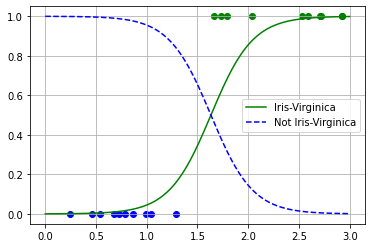

In [10]:
# Test model
np.random.seed(365)

num = 1000    # the number of testing examples
threshold = 0.5
X_generate = np.linspace(0, 3, num).reshape(-1, 1)    # generate petal width feature
X_test = np.c_[np.ones((num, 1)), X_generate]    # add X0=1

predict_proba, predict_binary = predict(X_test, theta, threshold)

# Choose indice
non_vir = np.random.choice(num//2 - 50, 10)
vir = np.random.choice(range(num//2 + 50, num), 10)

# plot
plt.scatter(X_generate[vir, :], predict_binary[vir], color="g")
plt.scatter(X_generate[non_vir, :], predict_binary[non_vir], color="b")
plt.plot(X_generate, predict_proba, "g-", label="Iris-Virginica")
plt.plot(X_generate, 1 - predict_proba, "b--", label="Not Iris-Virginica")
plt.legend()
plt.grid()

<a name='4.2' ></a>
### Sklearn model

Theta: [-7.194708301503785 4.333084596585777]


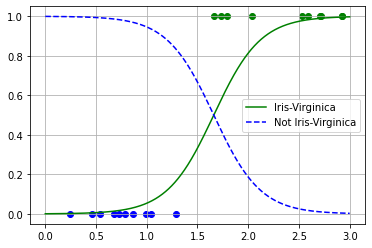

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=600)
model.fit(X, y)

theta_model = np.squeeze([model.intercept_, model.coef_])
print(f'Theta: {theta_model}')
predict_proba, predict_binary = model.predict_proba(X_generate), model.predict(X_generate)

# plot
plt.scatter(X_generate[vir, :], predict_binary[vir], color="g")
plt.scatter(X_generate[non_vir, :], predict_binary[non_vir], color="b")
plt.plot(X_generate, predict_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_generate, predict_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.legend()
plt.grid()

**Note:**
- We build this simple model from scratch to help you understand more deeply about Logistic Regression. However, Logistic Regression model in sklearn library has used many techniques to improve and develope. A little change in our model can make a different result than in sklearn.
- The hyperparameter controlling the regularization strength of a Scikit-Learn LogisticRegression model is not $\alpha$ (as in other linear models), but its inverse: $C$ . The higher the value of $C$ , the less the model is regularized.

<a name='5' ></a>
## Reference
- [Sentiment Analysis with Logistic Regression, Natural Language Processing with Classification and Vector Spaces](https://www.coursera.org/learn/classification-vector-spaces-in-nlp#syllabus)
